### Federico Moreno
#### federicomoreno613@gmail.com
#### https://www.linkedin.com/in/federico-moreno-32955316/
#### https://federicomoreno613.github.io/proyectos/

##### Consigna

1. Descargue el dataset y revise la información que contiene dentro, el mismo estᠥn formato csv.
2. Haga una lluvia de ideas sobre algunas preguntas que podrían esponder utilizando el conjunto de datos entregado, luego comience a responder esas preguntas. Intente y sugiera preguntas que promuevan la observacione, las relaciones entre mltiples variables. Debe intentar analizar al menos una variable dependiente y tres variables independientes en su investigacipon. Se adjunta un script en Python, el mismo se puede ejecutar utilizando Jupyter Notebook y te darᠵna idea para comenzar con el anᬩsis, sin embargo, puedes utilizar cualquier tecnologío lenguaje que te permita analizar el dataset y descartar el script.
3. Comparta sus hallazgosUna vez que hayas terminado de analizar los datos, cree un informe que comparta los resultados que le parecieron ás interesantes. Si usa Jupyter, comparta sus hallazgos junto con el c󤩧o que utiliz󠰡ra realizar el analisis. Asegrese de que el texto de su informe est contenido en las celdas de Markdown para distinguir claramente sus comentarios y conclusiones de su trabajo de c󤩧o. También debe sentirse libre de usar otras herramientas y software para elaborar su informe final, pero asegrese de que puede enviar su informe como un archivo HTML o PDF para que pueda abrirse fᣩlmente.

## Objetivo.

Mi objetivo es realizar una anlisis simple que pueda demostrar mis skills en el uso de Python y machine learning. Para esto intento realizar operaciones de data wranglin y data visualization para analizar las variables, luego realizar un modelo base con sckit-learn y por último sugerir un enfoque más novedoso desde el punto de vista del NLP.

Cómo **metodología** entiendo al Exploratory Data Analysis, cómo el avance sobre ciertos insights de las variables, siempre cuestionando acerca de las transformaciones que puedan existir en las variables y la posibilidad de hacer un feature engineering acorde a un tema que desconozco.  Por último el enfoque de Machine Learning me llevar a seleccionar las columnas interesantes cómo variables de capacidad predictora, y separar mi set de datos en entrenamiento y testeo, para poder realizar una buena evaluación del modelo, entendiendo si mi modelo underfitea, overfitea o tiene un buen balance.

Importo librerías base. Recordar que en la separación de entrenamiento y testeo hay un factor random por lo que la random_seed debe ser la misma que estoy usando para llegar a los mismos resultados. 

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

random_seed = 1988

### Lectura de dataset y dimension

In [2]:
df = pd.read_csv('tmdb-movies.csv', dtype={"imdb_id":str})
print(f"Dataset size: {df.shape}")

Dataset size: (10866, 21)


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Para observar todas las columnas transpongo el dataframe y inspecciono en que consiste.

In [4]:
df.head().T

,0,1,2,3,4
id,135397,76341,262500,140607,168259
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852
popularity,32.9858,28.4199,13.1125,11.1731,9.33501
budget,150000000,150000000,110000000,200000000,190000000
revenue,1513528810,378436354,295238201,2068178225,1506249360
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home


Observo que es un dataset de películas con su presupuesto, ganancia, tiempo en pantalla, genero de la película, keywords que la representan, etc.
Renombro mi dataset pertinente al tema

In [5]:
movies = df
del(df)

Realizo un resumen de estadística descriptiva de las variables númericas

### Datos faltantes

In [6]:
print(movies.isnull().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


## Analisis de variables
Observo que las variables con más datos faltantes son Homepage, tagline, Keywords, Production Companies, Cast y Director.
* Homepage es el sitio web de la película, en esta oportunidad no me interesa.
* Tagline es una frase que resumen a la película. Habría que analizar su construcción pero en caso de hacer una analisis de Palabras viendo que palabras se repiten más y a que sentimientos se asociación respecto a las peliculas taquilleras, el tag podría ser interesante aunque habría que ver cuanta información se pierde respecto al overview.
* Keywords: Es un item interesante aunque la dimensión de este trabajo lo exceda, me voy a quedar con la columna para aplicar la transformación tf-idf (term frequency–inverse document frequency)  que es uno de los métodos más populares para analizar el peso de un palabras en una colección de documentos. Para esto voy a tener que eliminar las stopwords y realizar algún tipo de normalización de esa columna.
* Production Companies, Cast y Director, en este momento no me interesa. Pero son interesante para futuros analisis respecto a la popularidad y revenue de las peliculas

In [7]:
movies = movies.drop(columns= ["homepage","tagline","production_companies","cast","director"])

In [8]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Correlaciones

Siguiendo la lógica del script sugerido observo las correlaciones para enfocarme principalmente en las variables que muestren cierto grado de asociación.

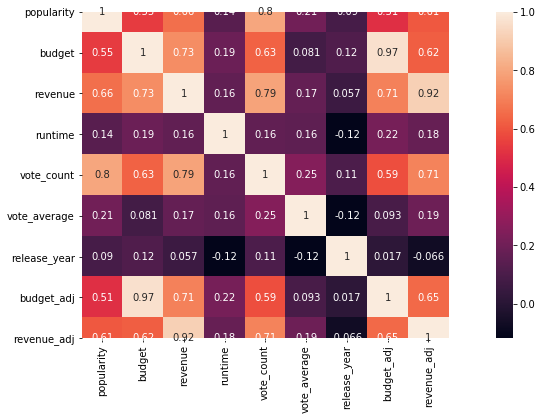

In [9]:
num_col = movies.dtypes[movies.dtypes != 'object'].index
plt.figure(figsize = (17,6));
corr = movies[num_col[1:]].corr()
sns.heatmap(corr,annot = True,square = True);

Se encuentra un alto grado de asociación entre Revenue, Badget y Vote Count

### Relación Revenue vs Budget

Realizo un scatter plot para obser la relación entre ambas variables

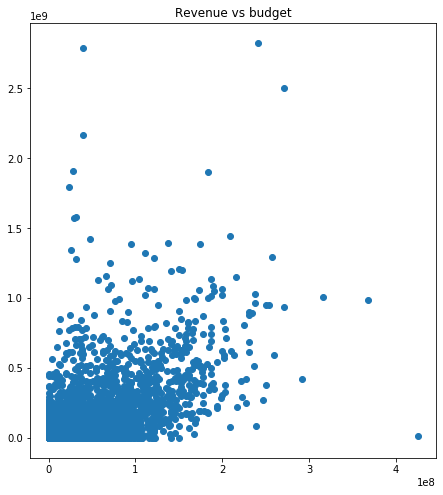

In [10]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movies['budget_adj'], movies['revenue_adj'])
plt.title('Revenue vs budget');

### Transformaciones
#### Analizo revenue vs revenue_adj


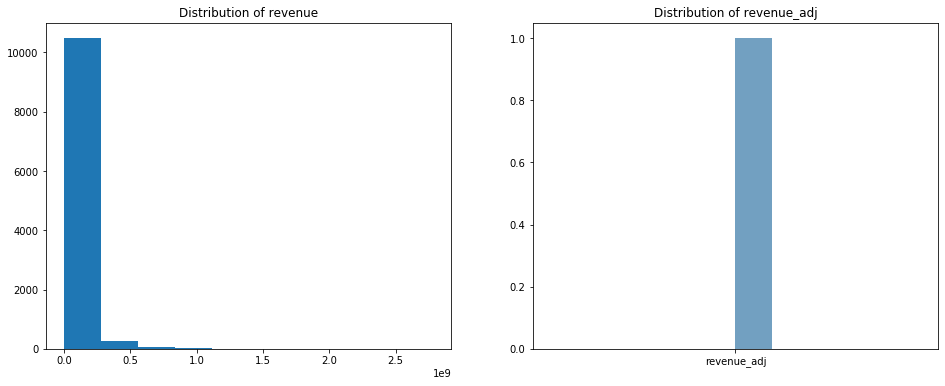

In [11]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(movies['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(['revenue_adj'], color = "#72A0C1" );
plt.title('Distribution of revenue_adj');

La distribución de revenue es asimetria y no entiendo en que consiste el ajuste del revenue, por lo tanto decido hacer mi propia transformación logaritmica.

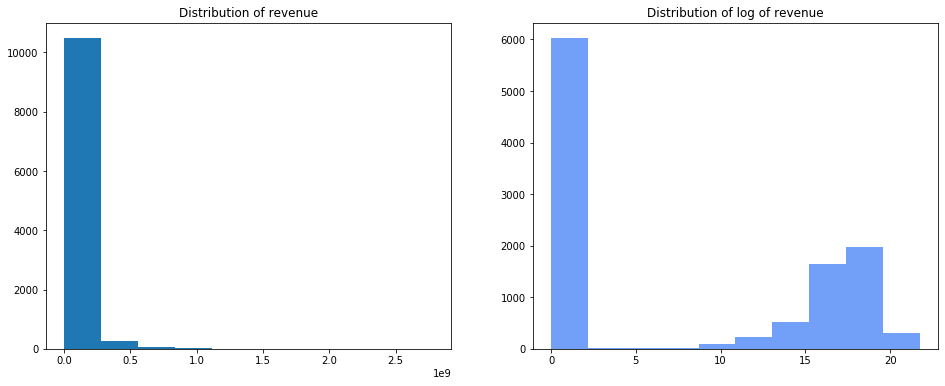

In [12]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(movies['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(movies['revenue']),color = "#72A0F9");
plt.title('Distribution of log of revenue');

## Budget

Repito analisis con Budget

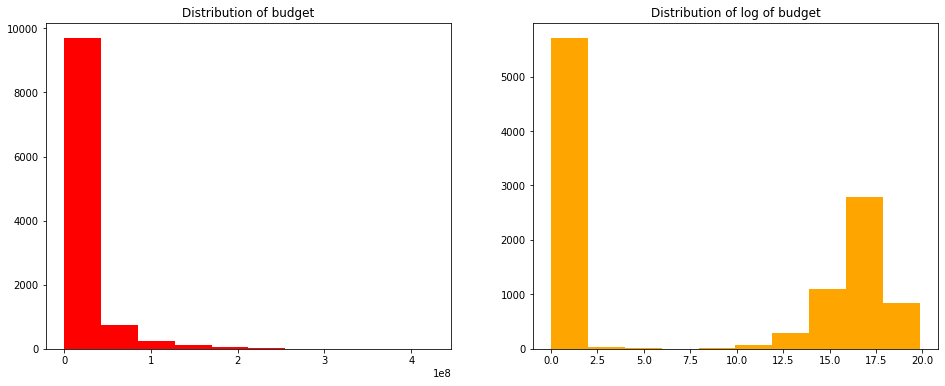

In [13]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(movies['budget'], color= "red");
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(movies['budget']), color= "orange");
plt.title('Distribution of log of budget');

We analize that revenu revenue distribution has a high skewness. We can justified the log transformation

In [14]:
movies['log_revenue'] = np.log1p(movies['revenue'])
movies['log_budget'] = np.log1p(movies['budget'])


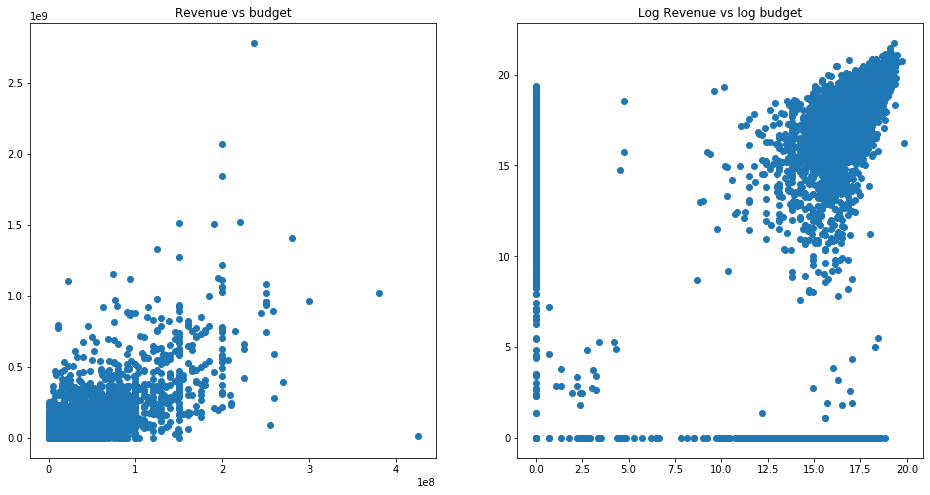

In [15]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movies['budget'], movies['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(movies['budget']), movies['log_revenue'])
plt.title('Log Revenue vs log budget');

Elimino Budget, Budget_adj, Revenue y Revenue_adj y selecciono la columna con la transformación logaritmica

In [16]:
movies = movies.drop(columns= ["revenue","budget","revenue_adj","budget_adj"])

In [17]:
movies.head()

,id,imdb_id,popularity,original_title,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,log_revenue,log_budget
0,135397,tt0369610,32.985763,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,21.137710,18.826146
1,76341,tt1392190,28.419936,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,19.751558,18.826146
2,262500,tt2908446,13.112507,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,19.503293,18.515991
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,21.449934,19.113828
4,168259,tt2820852,9.335014,Furious 7,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,21.132889,19.062535


# Genres

In [18]:
movies['genres'] .head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

Analizo por genero, para eso transformo el tipo de la columna de objeto a string.

In [19]:
movies['genres'] = movies['genres'].astype(str)

Me interesa quedarme sólo con tres generos por película inicialmente. Posiblemente al final decide quedarme arbitariamente con el primer genero que aparece

In [20]:
genres = pd.DataFrame((movies.genres.str.split('|').tolist()), index= movies.index)[[0,1,2]].rename(
    columns={
        0: "genre0",
        1: "genre1",
        2: "genre2"
    })
# Se agrega al dataset
movies = pd.concat([movies,genres], axis=1).drop("genres", axis=1)

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
original_title    10866 non-null object
keywords          9373 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
log_revenue       10866 non-null float64
log_budget        10866 non-null float64
genre0            10866 non-null object
genre1            8515 non-null object
genre2            5079 non-null object
dtypes: float64(4), int64(4), object(8)
memory usage: 1.3+ MB


In [22]:
movies.genre0.head()

0       Action
1       Action
2    Adventure
3       Action
4       Action
Name: genre0, dtype: object

# release_date

Realease_date puede ser interesante para entender si cambia el revenue según si el estreno se da los fines de semana o los días de semana, principio del mes o fin de mes. Yo hago la transformación a año pero en temporalidad decido quedamre solo con una de las dos columnas.

Transformo la variable a año

In [23]:
movies["release_date"]  =pd.to_datetime(movies["release_date"] ,errors ='coerce')

In [24]:
movies['year'] = movies.release_date.dt.year

In [25]:
movies["year"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: int64

In [26]:
movies["release_year"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: release_year, dtype: int64

In [27]:
movies = movies.drop(columns= ["release_year"])

In [28]:
movies = movies.drop(columns= ["release_date"])

# Grafico distribuciones

### Genero, Año, Duración y Revenue

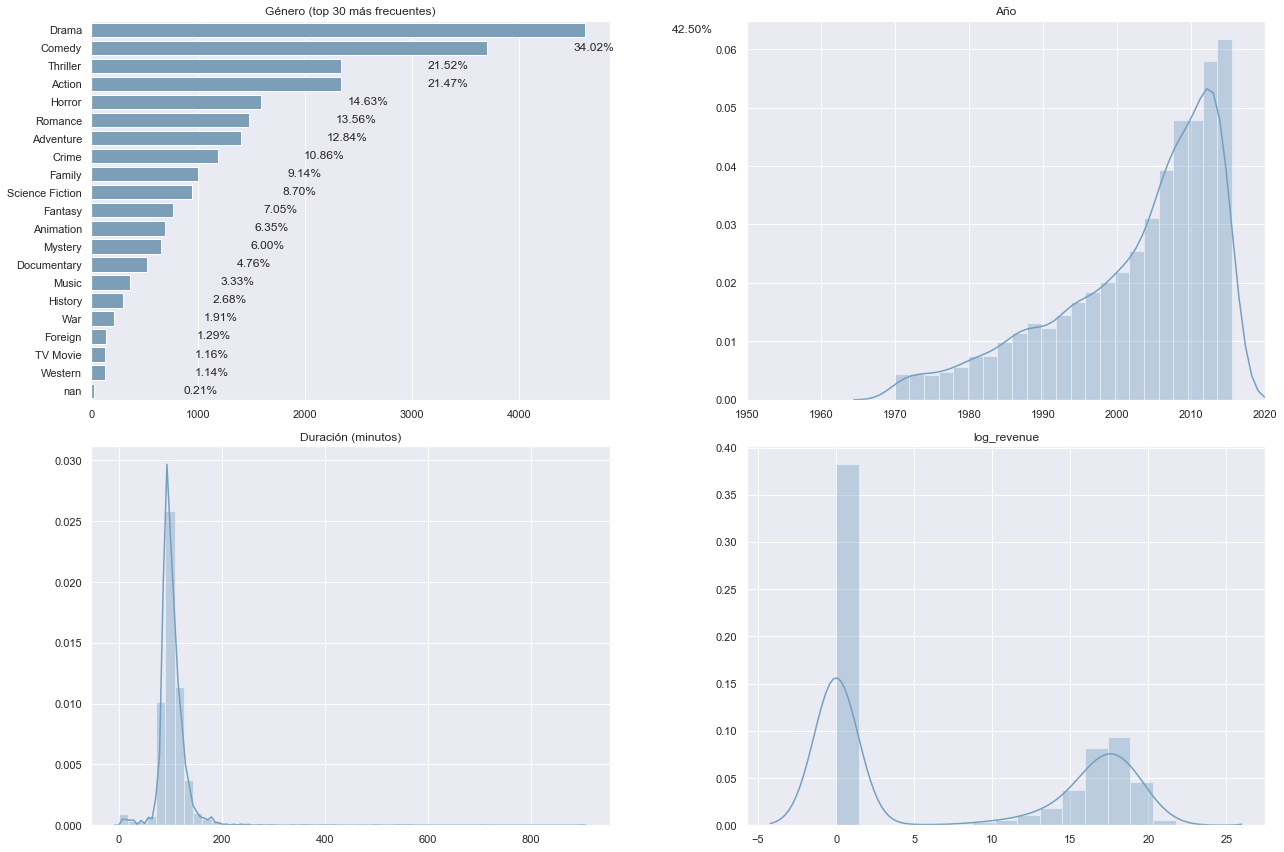

In [29]:
sns.set(rc={'figure.figsize':(18,12)})
#sns.set(font_scale = 2)

f, axes = plt.subplots(2, 2)
axes = axes.flatten()

color = "#72A0C1"


# Género (30 primeros)
#temp dataset
temp = pd.melt(movies[["imdb_id","genre0","genre1","genre2"]],id_vars = "imdb_id", var_name="column", value_name="genre")
# plot
ax0 = axes[0]
g0 = sns.countplot(data=temp, y='genre', color= color, ax=ax0, orient="h", order = temp["genre"].value_counts().iloc[:31].index)
ax0.title.set_text('Género (top 30 más frecuentes)')
ax0.set(ylabel="", xlabel="")#, xlim=(0,10000))
# Porcentaje   
total = float(len(movies))
for p in g0.patches:
    width = p.get_width()
    g0.text(width + 1000,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
del(temp)

# Año
ax1 = axes[1]
g1 = sns.distplot(movies["year"].dropna(), ax=ax1, color=color)
g1.set(ylabel="", xlabel="", xlim=(1950,2020))
ax1.set_title('Año')


# Duracion
ax2 = axes[2]
g2 = sns.distplot(movies["runtime"].dropna(), ax=ax2, color=color)
g2.set(ylabel="", xlabel="")
ax2.set_title('Duración (minutos)')

#Revenue
ax3 = axes[3]
g3 = sns.distplot(movies["log_revenue"].dropna(), ax=ax3, color=color)
g3.set(ylabel="", xlabel="")
ax3.set_title('log_revenue')




plt.tight_layout()

### Popularity vs Revenue

¿Cual es la relacion entre revenue y popularidad?


Text(0.5, 1.0, 'Relacion entre Revenue y Popularidad')

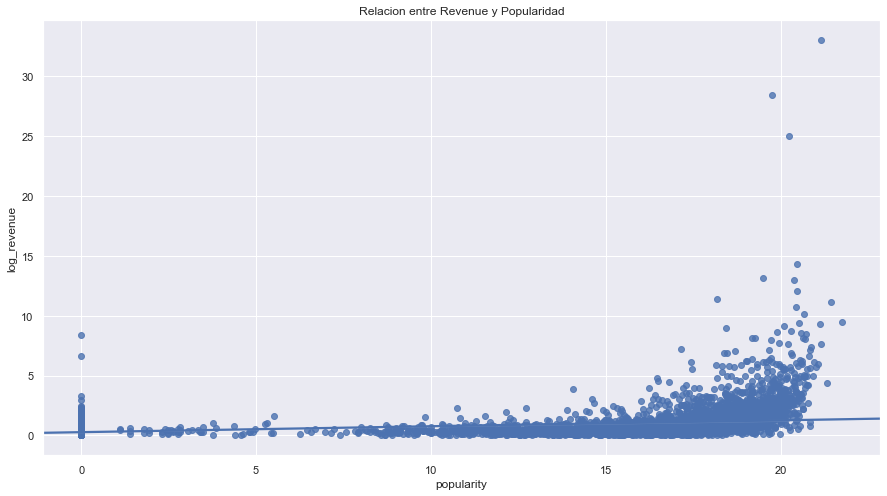

In [30]:
sns.set()
x=movies['log_revenue']
y=movies['popularity']
plt.figure(figsize=(15,8))
sns.regplot(x,y)
plt.xlabel('popularity')
plt.ylabel('log_revenue')
plt.title('Relacion entre Revenue y Popularidad')

# Keywords


In [31]:
movies['keywords'] = movies['keywords'].astype(str)

In [32]:
print('Cantidad de palabras en las peliculas')
movies['keywords'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)
    

Cantidad de palabras en las peliculas


3     1507
45     266
43     258
41     254
49     239
46     234
47     233
44     231
42     228
48     222
Name: keywords, dtype: int64

Dejare este item para correr a posterior la transformación *Tf-idf* analizando el número de documentos en los que aparece la palabra W en relación a los documentos de la colección.

# Modelos

## Regresion lineal Multiple

La idea es predecir una variable continua para eso vamos a utilizar una regresión y no un clasificador. La idea es poder hacer un modelo de base que apunte más a entender el problema que a realizar una predicción. Por eso dado que los regresores son robustos, la idea es correr una regresión lineal multiple y poder interpretar los coefficientes.

Varias sugerencias nos aparecieron en la exploración de datos. Esto es sobre la correlación entre el log del presupuesto y el log del revenue.

In [33]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from nltk import word_tokenize, sent_tokenize                    
from sklearn.linear_model import LinearRegression

In [34]:
# Hago una copia de mi dataset
movies0 = movies
movies0.head()

,id,imdb_id,popularity,original_title,keywords,overview,runtime,vote_count,vote_average,log_revenue,log_budget,genre0,genre1,genre2,year
0,135397,tt0369610,32.985763,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,5562,6.5,21.137710,18.826146,Action,Adventure,Science Fiction,2015
1,76341,tt1392190,28.419936,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,6185,7.1,19.751558,18.826146,Action,Adventure,Science Fiction,2015
2,262500,tt2908446,13.112507,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,2480,6.3,19.503293,18.515991,Adventure,Science Fiction,Thriller,2015
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,5292,7.5,21.449934,19.113828,Action,Adventure,Science Fiction,2015
4,168259,tt2820852,9.335014,Furious 7,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,2947,7.3,21.132889,19.062535,Action,Crime,Thriller,2015


In [35]:
movies0 = movies0.drop(columns= ["keywords","overview","genre1","genre2"])

In [36]:
print(movies0.isnull().sum())

id                 0
imdb_id           10
popularity         0
original_title     0
runtime            0
vote_count         0
vote_average       0
log_revenue        0
log_budget         0
genre0             0
year               0
dtype: int64


In [37]:
movies0 = movies0.drop(columns= ["imdb_id"])

In [38]:
# Remuevo NA para correr regresion
movies0 = movies0.dropna()

In [39]:
print(f"El dataset original con NA tiene dimension: {movies.shape}")
print(f"El dataset sin NA tiene de dimension: {movies0.shape}")

El dataset original con NA tiene dimension: (10866, 15)
El dataset sin NA tiene de dimension: (10866, 10)


In [40]:
dataset = movies0

### Modelo 1:
#### Variable Dependiente: log_revenue
#### Variables Independientes: popularity,runtime,vote_count,vote_average,log_budget,year

In [41]:
X = dataset[["popularity","runtime","vote_count","vote_average","log_budget","year"]]
y = dataset['log_revenue']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
popularity,0.843855
runtime,0.011523
vote_count,0.001594
vote_average,0.819544
log_budget,0.562061
year,-0.048879


In [45]:
y_pred = regressor.predict(X_test)

In [46]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
154,0.000000,12.076226
7023,19.131510,14.672192
7420,0.000000,4.725726
9234,16.622181,12.063125
7540,17.104290,12.261932
6443,0.000000,3.035565
6619,17.589314,13.911113
9524,17.587242,12.990023
3728,0.000000,2.699356
7706,12.302073,9.184463


### RSME: baseline

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.839517905794326
Mean Squared Error: 38.38895380261194
Root Mean Squared Error: 6.195882003606261


#### Observamos conclusiones

Cómo se puede observar el Mean Square Error es de 38%, lo cual es mucho mayor que un aceptable 10%. Nuestro algoritmo no es bastante preciso. Suele suceder con lo modeos lineales que esta caída de bias se sopesa con un aumento de la robustez. 

Sería interesante correr un modelo descartando vote_count el cual afecta en muy poca magnitud al revenue, y por otro lado utilizar el genero de la pelícual cómo variable dummies

### Modelo 2: 
#### Implicancias de los generos en el revenue

##### Variables Dummies
##### Variable Dependiente: log_revenue
##### Variables Independientes: popularity,runtime,,vote_average,log_budget,year,generos_..

Elimino vote_count dado que no es significativo y me quedo con el promedio de los votos, lo cual es un medida mucho más lógica, una película puede tener muchos conteos de "1"´s por ser una pelicula odiada y tener un gran vote_count.

In [48]:
dataset = dataset.drop(columns= ["vote_count"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 0 to 10865
Data columns (total 9 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
vote_average      10866 non-null float64
log_revenue       10866 non-null float64
log_budget        10866 non-null float64
genre0            10866 non-null object
year              10866 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 848.9+ KB


In [49]:
dataset = pd.get_dummies(dataset, columns=["genre0"])
#obtengo nuevas columnas dummies

In [50]:
dataset.head().T

,0,1,2,3,4
id,135397,76341,262500,140607,168259
popularity,32.9858,28.4199,13.1125,11.1731,9.33501
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
runtime,124,120,119,136,137
vote_average,6.5,7.1,6.3,7.5,7.3
log_revenue,21.1377,19.7516,19.5033,21.4499,21.1329
log_budget,18.8261,18.8261,18.516,19.1138,19.0625
year,2015,2015,2015,2015,2015
genre0_Action,1,1,0,1,1
genre0_Adventure,0,0,1,0,0


In [51]:
cols = [col for col in dataset.columns if col not in ['log_revenue',"id","original_title"]]
X = dataset[cols]
y = dataset['log_revenue']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
popularity,1.480779
genre0_Comedy,1.274959
genre0_Adventure,1.181424
vote_average,0.975539
genre0_Western,0.928007
genre0_Romance,0.909969
genre0_Fantasy,0.877217
genre0_Action,0.722653
genre0_Crime,0.695413
genre0_Mystery,0.666606


In [55]:
y_pred = regressor.predict(X_test)

In [56]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
154,0.000000,12.679446
7023,19.131510,15.230681
7420,0.000000,3.944313
9234,16.622181,11.943468
7540,17.104290,12.625186


# Conclusiones

In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.784295375121018
Mean Squared Error: 38.00942158591247
Root Mean Squared Error: 6.165178147135123


**A Saber**  Sería mejor buscar no tanto un mayor Revenue, sino un  **Return on investment ROI**, es decir, me interesaría e ratio entre el net profit y el costo de la inversión. UN mayor ROI significa que la inversión genera ganancia comparado a su costo. Es una mejor medida de performance y ahí tendría sentido directamente utilizar los valores originales de Revenue y de Budget

La librería statsmodel me puede solucionar las falencias de skitlearn. En la anterior salida tenia un modelo con el mismo MSE, pero tal vez mayor capacidad explicativa. Las salidas Sckit-learn omiten los test de significancia. Para eso utilizo statsmodels!

In [58]:
import statsmodels.api as sm
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
res.fit().summary()


C:\Users\fede_\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_revenue   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     80.93
Date:                Tue, 16 Jun 2020   Prob (F-statistic):          3.70e-287
Time:                        15:50:18   Log-Likelihood:                -7014.1
No. Observations:                2174   AIC:                         1.408e+04
Df Residuals:                    2148   BIC:                         1.423e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     89.9655     16.190      5.557      0.000      58.216     121.715
popularity                 2.6116      0.196     13.358      0.000       2.228       2.995
runtime                    0.0093      0.004      2.221      0.026       0.001       0.017
vote_average               0.8161      0.164      4.989      0.000       0.495       1.137
log_budget                 0.5188      0.018     28.645      0.000       0.483       0.554
year                      -0.0494      0.008     -5.878      0.000      -0.066      -0.033
genre0_Action              5.2042      0.863      6.033      0.000       3.513       6.896
genre0_Adventure           5.4879      0.986      5.564      0.000       3.554       7.422
genre0_Animation           3.3261      1.096      3.036      0.002       1.178       5.475
genre0_Comedy              5.6480      0.870      6.490      0.000       3.941       7.355
genre0_Crime               4.9089      1.094      4.489      0.000       2.764       7.053
genre0_Documentary         3.5110      1.086      3.232      0.001       1.381       5.641
genre0_Drama               5.5289      0.881      6.275      0.000       3.801       7.257
genre0_Family              5.0064      1.487      3.366      0.001       2.089       7.923
genre0_Fantasy             6.0242      1.108      5.435      0.000       3.851       8.198
genre0_Foreign             1.3226      3.466      0.382      0.703      -5.475       8.120
genre0_History             5.4451      1.994      2.730      0.006       1.534       9.356
genre0_Horror              5.0509      0.918      5.503      0.000       3.251       6.851
genre0_Music               4.7827      1.593      3.003      0.003       1.659       7.906
genre0_Mystery             4.4321      1.406      3.152      0.002       1.674       7.190
genre0_Romance             3.4456      1.261      2.732      0.006       0.972       5.919
genre0_Science Fiction     4.4328      1.364      3.250      0.001       1.758       7.108
genre0_TV Movie            2.4116      1.866      1.292      0.196      -1.248       6.072
genre0_Thriller            4.5782      1.051      4.354      0.000       2.516       6.640
genre0_War                 4.7020      1.756      2.678      0.007       1.258       8.146
genre0_Western             2.0301      4.254      0.477      0.633      -6.312      10.372
genre0_nan                 2.6859      2.544      1.056      0.291      -2.303       7.675
==============================================================================
Omnibus:                        1.997   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.907
Skew:                           0.061   Prob(JB):                        0.385
Kurtosis:                       3.080

El coeficiente de Runtime no me da significativo, cómo tampoco los generos Western y sin genero.
Vemos que la capacidad explicativa del modelo es bajisima con R2 de 0.48%

# Brainstorming: Tf-idf

Keywords: Es un item interesante aunque la dimensión de este trabajo lo exceda, me voy a quedar con la columna para aplicar la transformación tf-idf (term frequency–inverse document frequency)  que es uno de los métodos más populares para analizar el peso de un palabras en una colección de documentos. Para esto voy a tener que eliminar las stopwords y realizar algún tipo de normalización de esa columna.

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize.treebank import TreebankWordDetokenizer
import eli5

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fede_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fede_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Remuevo stopwords

### Utilizo el dataset que use para el EDA movies

In [79]:
movies.keywords.head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [82]:
movies["texto_limpio"] = movies.keywords.str.split('|')
movies.texto_limpio

0        [monster, dna, tyrannosaurus rex, velociraptor...
1        [future, chase, post-apocalyptic, dystopia, au...
2        [based on novel, revolution, dystopia, sequel,...
3              [android, spaceship, jedi, space opera, 3d]
4                [car race, speed, revenge, suspense, car]
                               ...                        
10861                         [surfer, surfboard, surfing]
10862                        [car race, racing, formula 1]
10863                         [car, trolley, stealing car]
10864                                              [spoof]
10865            [fire, gun, drive, sacrifice, flashlight]
Name: texto_limpio, Length: 10866, dtype: object

In [83]:
movies['tokens'] = pd.DataFrame([str(line).strip('[').strip(']').replace("'","") for line in movies["texto_limpio"] ])

In [84]:
movies.tokens

0        monster, dna, tyrannosaurus rex, velociraptor,...
1        future, chase, post-apocalyptic, dystopia, aus...
2        based on novel, revolution, dystopia, sequel, ...
3                android, spaceship, jedi, space opera, 3d
4                  car race, speed, revenge, suspense, car
                               ...                        
10861                           surfer, surfboard, surfing
10862                          car race, racing, formula 1
10863                           car, trolley, stealing car
10864                                                spoof
10865              fire, gun, drive, sacrifice, flashlight
Name: tokens, Length: 10866, dtype: object

## Normalizo mi corpus de palabras.
Paso a minuscula, tokenizo y remuevo stopwords

In [85]:
english_stopwords = nltk.corpus.stopwords.words("english") 


Las palabras stopwords son articulos y pronombres que en este analisis no me importan. Podrían ser interesantes para estudiar sesgo de genero y analizar PMI (point, mutal information) respecto a los vectores asociados a generos como pronombres en relacion a estereotipos

In [86]:
english_stopwords[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [87]:
stop= [w for w in english_stopwords]

In [88]:
for i in range(0, len(movies)):
    tokens = word_tokenize(movies.tokens[i],language="english")
    palabras = [token.lower() for token in tokens if token.lower() not in stop and token.isalpha()]
    string= TreebankWordDetokenizer().detokenize(palabras)
    movies['tokens'][i] = string


C:\Users\fede_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [89]:
movies.head().T  

,0,1,2,3,4
id,135397,76341,262500,140607,168259
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852
popularity,32.9858,28.4199,13.1125,11.1731,9.33501
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,future|chase|post-apocalyptic|dystopia|australia,based on novel|revolution|dystopia|sequel|dyst...,android|spaceship|jedi|space opera|3d,car race|speed|revenge|suspense|car
overview,Twenty-two years after the events of Jurassic ...,An apocalyptic story set in the furthest reach...,Beatrice Prior must confront her inner demons ...,Thirty years after defeating the Galactic Empi...,Deckard Shaw seeks revenge against Dominic Tor...
runtime,124,120,119,136,137
vote_count,5562,6185,2480,5292,2947
vote_average,6.5,7.1,6.3,7.5,7.3
log_revenue,21.1377,19.7516,19.5033,21.4499,21.1329


In [90]:
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(movies['tokens'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, movies['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

Weight?,Feature
+55.437,prisoners
+53.937,orcs tolkien
+47.498,name title
+46.941,climate
+46.594,falling love
+45.613,mother role
+44.657,elves dwarves
+43.974,adaptation
+42.172,experiment human
+41.953,civil rights


Algunas palabras pueden ser utilizadas para predecir el revenue, pero para construir un buen modelo sería mejor utilzar la columna entera de overviewed

In [91]:
print('Target value:', movies['log_revenue'][10])
eli5.show_prediction(linreg, doc=movies['tokens'].values[1000], vec=vectorizer)

Target value: 20.59619877401982


El trabajo a plantear sería el siguiente. Sumarle las variables transformadas por su peso en el total de los documentos (transformacion TF-IDF) y crear variables para predecir la relación entre uso de palabras y revenue o en el caso de que ya nos planteamos utilizariamos ROI. 

Un enfoque computacionalmente caro sería utilizar cada palabra cómo columna y predecir en función de cada palabras. Otro enfoque posible es poder crear más feature, tanto analizando el TAG, el Overview o el mismo el título para entender las relaciones que pueden haber de similaridad semantica a la hora de generar mayor revenue. A ideas simples, podríamos preguntarnos si es mejor un título de 3 palabras, de 2 o de 1. Si ese título tiene que tener entidades, articulos y que sentimientos (neutro, negativo o positivo) deberíamos evocar para tener más probabilidad de aumentar nuestro revenue.

Este analisis es analogo a cualquiera de las variables de texto.

En mi caso tengo experiencia en utilizar words embeddings pre entrenados con wikipedia o google news, y por la cual podríamos clusterecir a las peliculas con mayor Revenue en relación a esos embeddigns pre entrenados. ¿Habrá alguna correspondencia entre las distancias de significado hacia un concepto y el revenue? 


**Palabras finales**

En esta instancia de Evaluación se realizo una profunda exploración de los datos, se implemento una regresión simple, luego se le agregaron varias Dummies y por último se intento probar una implementación de NLP para evaluar el peso de las palabras TAGS en relación al Revenu.

* **Autor**: Federico Nicolás Moreno 
* **Mail**: federicomoreno613@gmail.com 
* **celular** 1167626290 